#Projeto C213 - Grupo 3
##Membros: Lara Conte Gomes e Lívia Cecília Gomes Silva

### Instalação da biblioteca Scipy
Utilizada para:
- Leitura de arquivos `.mat` do Matlab, e colocá-los como arrays NumPy.
- Processamento de Sinais.
- Ajustes e resolução de contas científicas.

Algumas funções também que podem ser utilizadas com essa biblioteca:
- `scipy.signal` para filtros, convolução, FFT(Transformada Rápida de Fourier)
- `scipy.optimize` para ajustes de alguns parâmetros.
- `scipy.integrate` para resolver EDO(Equações Diferenciais Ordinárias).

Abaixo está o comando para a instalação da biblioteca

In [2]:
pip install scipy

### Instalação da biblioteca Control
Utilizada para:
- Sistemas de controle (linear e tempo contínuo/discreto).

Algumas funções também que podem ser utilizadas com essa biblioteca:
- `tf` cria funções de transferência.
- `pade` para a geração da aproximação de Padé para representar o atraso.
- `feedback` para montagem da malha fechada.
- `step_response` para cálculo da resposta ao degrau (tempo e saída são simulados).

Abaixo está o comando para a instalação da biblioteca

In [3]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 7.1 MB/s eta 0:00:00


Em `import scipy.io as sio` está ocorrendo a importação de um módulo da biblioteca SciPy chamada `io`.
Ele é utilizado para abrir, ler e gravar arquivos que foram criados com o software MATLAB (extensão `.mat`).

In [4]:
import scipy.io as sio

#Carregando o arquivo de dados .mat e guardando em um dicionário (estrutura chave:valor)
data = sio.loadmat('Dataset_Grupo3_c213.mat')

#Mostrando os nomes das variáveis armazenadas no arquivo .mat
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'dados_entrada', 'dados_saida', 'tiempo', 'entrada', 'salida', 'parametros_sistema', 'configuracion_experimento'])


 - `matplotlib.pyplot` para mostrar os resultados em formato de gráfico.

 - `numpy` para pré-processamento de dados, cálculo de métricas (tr, ts, overshoot) e manipulações matemáticas.

In [5]:
#Importando as bibliotecas que serão utilizadas
import numpy as np
from control import tf, feedback, step_response, pade
import matplotlib.pyplot as plt

`np.ravel` coloca qualquer estrutura de dados NumPy em um vetor 1D (linha contínua de valores)

`u0`: valor médio da entrada antes do degrau

`u1`: valor médio da entrada depois do degrau

`y0`: valor médio da saída antes da mudança

`y1`: valor médio da saída depois de estabilizar

`du_raw`: tamanho do degrau aplicado (diferença entre eles)

`dy`: quanto o sistema respondeu (diferença entre eles)

In [6]:
t = np.ravel(data['tiempo']) #t = tempo
u = np.ravel(data['entrada']) #u = entrada aplicada (degrau)
y = np.ravel(data['salida']) #y = saída medida (resposta do processo)

`Ganho estático`: quanto a saída muda para cada 1 unidade que se muda na entrada.

In [7]:
#Cálculo da média entre entrada e saída para evitar pequeno pico ou oscilação
u0, u1 = np.mean(u[:50]), np.mean(u[-50:])
y0, y1 = np.mean(y[:50]), np.mean(y[-50:])

#Cálculos de quanto a entrada mudou (du_raw) e quanto a saída mudou (dy)
du_raw, dy = (u1 - u0), (y1 - y0)

#Verificação se existe um degrau na entrada
if abs(du_raw) > 1e-12:
  du = du_raw
else:
  #Se não tiver degrau, usa-se o valor médio da entrada (evitando que o código quebre)
  du = float(np.mean(u))

#Cálculo do ganho estático
if abs(du) > 1e-12:
  k = dy / du
else:
  k = np.nan

- Sistema não detectou nenhuma variação real na entrada (valores permaneceram em 75).

 - Ocorreu uma variação grande na saída (44.39).

 - Ou seja, o sistema respondeu à entrada, gerando um bom ganho (mudanças na entrada geraram impacto na saída).

In [8]:
#4g = 4 algoritmos significativos, g -> formato 'general' (Python escolhe notação normal ou científica)
print("Valores da entrada: ")
print(f"u0 = {u0:.4g}")
print(f"u1 = {u1:.4g}")
print(f"du (degrau unitário) = {du:.4g}")

print("\nValores da saída: ")
print(f"y0 = {y0:.4g}")
print(f"y1 = {y1:.4g}")
print(f"dy (variação da saída) = {dy:.4g}")

print(f"\nGanho estático (k) = {k:.4g}")

Valores da entrada: 
u0 = 75
u1 = 75
du (degrau unitário) = 75

Valores da saída: 
y0 = 7.051
y1 = 51.45
dy (variação da saída) = 44.39

Ganho estático (k) = 0.5919


Está ocorrendo a normalização de y, para ir de 0 até 1 (facilitando para o encontro das porcentagens).

 - `time_at_norm`: retorna o primeiro instante onde a resposta normalizada atinge o percentual de p.

In [9]:
#Cálculo da diferença total da saída (tamanho total da variação da saída)
dif_saida = (y1 - y0)

#Verificação se a variação da saída é diferente de zero (para facilitar a comparação dos percentuais de resposta)
if abs(dif_saida) > 1e-12:
  #Normalização da saída: curva vai de 0 (início) até 1 (final)
  y_norm = (y - y0) / dif_saida
else:
  #Se a variação for zero, cria-se um vetor de zeros para que não ocorra erros
  y_norm = np.zeros_like(y)

def time_at_norm (percent):
  #Tenta encontrar os índices onde a saída normalizada atinge ou ultrapassa o valor desejado
  id = np.where(y_norm >= percent)[0]

  #Se tiver pelo menos um ponto que atinge esse percentual
  if len(id) > 0:
    #Retorna o tempo correspondente a ele
    return t[id[0]]
  else:
    return np.nan


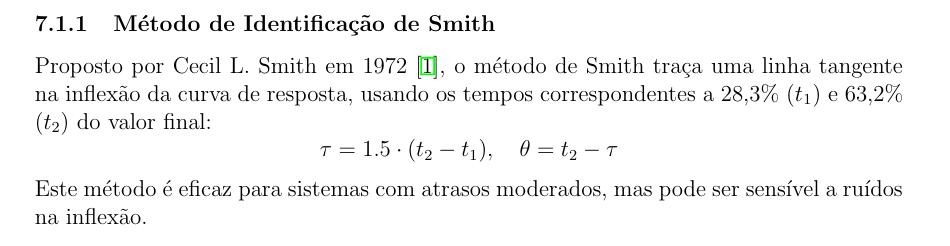

In [10]:
#Identificações de (FOPDT)
#Smith: 28.3% e 63.2%
t1_smith = time_at_norm(0.283)
t2_smith = time_at_norm(0.632)

#Veirificação se os tempos são finitos (isfinite)
if np.isfinite(t1_smith) and np.isfinite(t2_smith):
  tau_smith = 1.5 * (t2_smith - t1_smith)
else:
  tau_smith = np.nan

#Veirificação se o tau é finito (isfinite)
if np.isfinite(tau_smith):
  theta_smith = t2_smith - tau_smith
else:
  theta_smith = np.nan


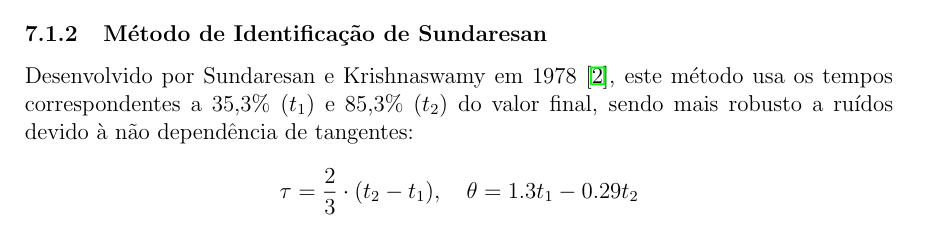

Objetivo foi calcular theta e tau utilizando os métodos Smith e Sundaresan & Krishnaswamy.

Para que, assim, se tenha a `constante de tempo (theta)`, para saber o quão rápido o sistema reage. E o `atraso de transporte (tau)`, para saber quanto tempo o sistema demora para começar a responder.

In [11]:
#Sundaresan & Krishnaswamy: 35.3% e 85.3%
t1_sun_k = time_at_norm(0.353)
t2_sun_k = time_at_norm(0.853)

#Veirificação se os tempos são finitos (isfinite)
if np.isfinite(t1_sun_k) and np.isfinite(t2_sun_k):
  tau_sun_k = (2/3) * (t2_sun_k - t1_sun_k)
  theta_sun_k = 1.3 * t1_sun_k - 0.29 * t2_sun_k
else:
  tau_sun_k = np.nan
  theta_sun_k = np.nan

- `Planta FOPDT`: sistema de primeira ordem, mostra como a saída reage no tempo

- `Atraso (Padé)`: tempo que o sistema demora para começar a reagir.
OBS: Padé é uma aproximação, transforma o atraso em uma equação similar com um filtro.

- `Planta com atraso`: montagem do modelo final, representando o comportamento real do sistema com atraso.

- `Resposta ao degrau`: como o sistema reage com a entrada de um degrau.
`step_response(Gp)`: simula a resposta ao degrau de 1 unidade (de 0 irá para 1), gerando assim o y_step(t) (curva teórica da saída normalizada).

In [12]:
def simulacao_FOPDT(k, tau, theta, t, du, y0):
  #Validação dos parâmetros
  if not np.isfinite(k) or not np.isfinite(tau) or not np.isfinite(theta):
    #np.full_like -> cria um novo array com o mesmo tamanho de outro, mas preechido com um único valor
    return np.full_like(t, np.nan, dtype=float)
  if tau <= 0 or theta < 0:
    return np.full_like(t, np.nan, dtype=float)

  #Cálculo da planta FOPDT: G(s) = k / (tau*s + 1)
  G = tf([k], [tau, 1])

  #Aproximar o atraso e^(-theta s) por Padé de primeira ordem
  nd, dd = pade(theta, 1)
  Gd = tf(nd, dd)

  #Cálculo da planta completa com atraso
  Gp = G * Gd

  #Resposta ao degrau unitário
  t_sim, y_step = step_response(Gp, T=t)

  #Escalar para o degrau real (du) e somar o nível inicial (y0)
  y_hat = y0 + du * y_step

  return y_hat

- `RMSE`: erro quadrático médio da raiz, mede o quão perto o modelo está dos dados reais. Quanto menor for, melhor é o ajuste.

In [13]:
#RMSE: erro médio entre os dados e o modelo
def rmse(y_true, y_hat):
  #Se a simulação falou (NaN), retornar infinito
  if np.isnan(y_hat).any():
    return np.inf

  #Cálculo RMSE: sqrt(mean((erro)^2))
  erro = y_true - y_hat

  return np.sqrt(np.mean(erro**2))

- Acima, está sendo feito uma simulação dos dois modelos, Smith ou Sundaresan.

- Se faz o cálculo do RMSE de cada um, e escolhe o que tem o menor RMSE.

In [14]:
y_hat_smith = simulacao_FOPDT(k, tau_smith, theta_smith, t, du, y0)
y_hat_sun_k = simulacao_FOPDT(k, tau_sun_k, theta_sun_k, t, du, y0)

rmse_smith = rmse(y, y_hat_smith)
rmse_sun_k = rmse(y, y_hat_sun_k)

if rmse_smith <= rmse_sun_k:
    tau = tau_smith
    theta = theta_smith
    method_id = "Smith"
else:
    tau = tau_sun_k
    theta = theta_sun_k
    method_id = "Sundaresan"

- Mostra o modelo escolhido e valida os parâmetros finais.

In [15]:
print(f"Chosen model: {method_id}  ->  k={k:.4g}, tau={tau:.4g}, theta={theta:.4g}")

if (not np.isfinite(k)) or (not np.isfinite(tau)) or (not np.isfinite(theta)) or (tau <= 0) or (theta < 0):
    raise RuntimeError("Identification failed (non-finite or invalid parameters). Check input signals.")

Chosen model: Sundaresan  ->  k=0.5919, tau=43, theta=14.12


Acima, foram utilizadas as fórmulas clássicas de CHR (com sobressinal ~ 20%) para um processo FOPDT.

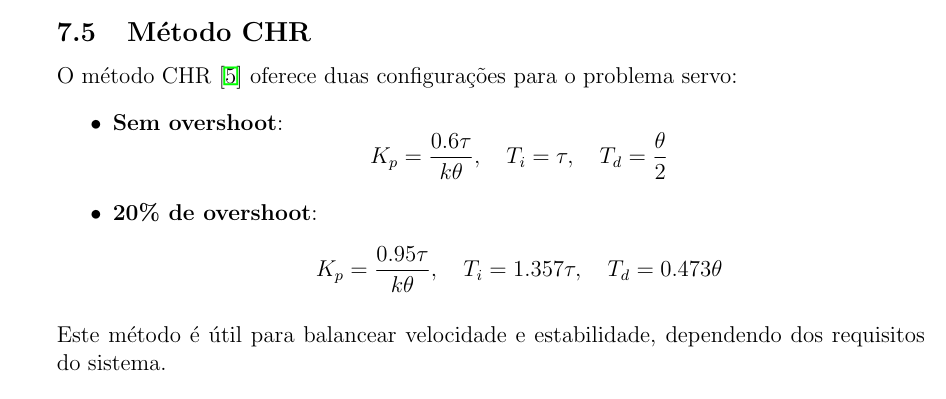

In [16]:
def pid_from_chr_overshoot(k, tau, theta):
  #Verificações
  if (not np.isfinite(k)) or (not np.isfinite(tau)) or (not np.isfinite(theta)):
    return np.nan, np.nan, np.nan
  if k <= 0 or tau <= 0 or theta <= 0:
    return np.nan, np.nan, np.nan

  #Kp = ganho proporcional
  Kp = 0.95 * tau / (k * theta)

  #Tempo integral
  Ti = 1.357 * tau

  #Tempo derivativo
  Td = 0.473 * theta

  return Kp, Ti, Td


- Utilização das correlações ITAE para minimizar o erro absoluto integrado ponderado pelo tempo (resposta mais suave e geralmente menos overshoot).

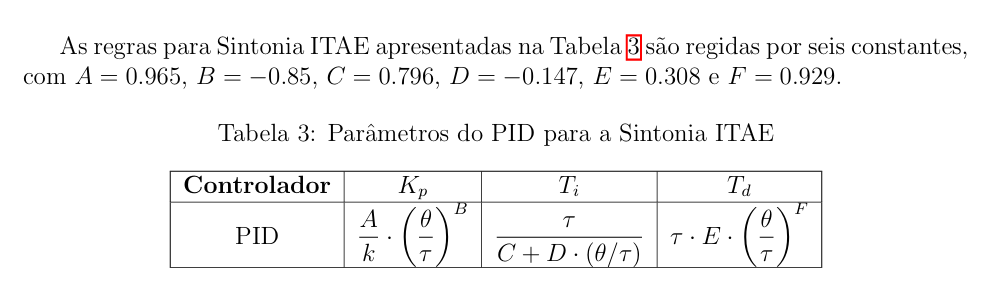

In [17]:
def pid_from_itae(k, tau, theta):
  #Verificações
  if (not np.isfinite(k)) or (not np.isfinite(tau)) or (not np.isfinite(theta)):
    return np.nan, np.nan, np.nan
  if k <= 0 or tau <= 0 or theta <= 0:
    return np.nan, np.nan, np.nan

  A, B, C, D, E, F = 0.965, -0.85, 0.796, -0.147, 0.308, 0.929

  Kp = (A / k) * (theta / tau)**B

  Ti = tau * (C + D * (theta/tau))

  Td = tau * E * (theta/tau)**F

  return Kp, Ti, Td

- Montando a função de transferência do PID ideal (forma paralela). Sem filtro derivativo, e Ti e Td são tempos em segundos.

In [18]:
def pid_tf(Kp, Ti, Td):
  #Evitando dividir por zero quando Ti for inválido
  if (not np.isfinite(Kp)) or (not np.isfinite(Ti)) or (not np.isfinite(Td)):
      return tf([0], [1])
  if Ti <= 0:
      return tf([0], [1])  #Evita Kp/Ti inválido

  num = [Kp*Td, Kp, Kp/Ti]
  den = [1, 0]
  return tf(num, den)

In [19]:
#Chamadas de sintonia. Cálculo dos dois conjuntos de PID para comparar na simulação
#CHR com sobressinal
Kp_chr, Ti_chr, Td_chr = pid_from_chr_overshoot(k, tau, theta)

#ITAE
Kp_itae, Ti_itae, Td_itae = pid_from_itae(k, tau, theta)

In [20]:
def closed_loop_response(Kp, Ti, Td, k, tau, theta, t):

  #Planta FOPDT com atraso (Padé primeira ordem)
  Gp = tf([k], [tau, 1]) * tf(*pade(theta, 1))

  #Controlador PID
  Gc = pid_tf(Kp, Ti, Td)

  #Malha fechada unitária
  T = feedback(Gc * Gp, 1)

  return step_response(T, T=t) #Retorna t_sim e y_sim

In [21]:
t_ch, y_ch = closed_loop_response(Kp_chr,  Ti_chr,  Td_chr,  k, tau, theta, t)
t_it, y_it = closed_loop_response(Kp_itae, Ti_itae, Td_itae, k, tau, theta, t)

In [22]:
def metrics(t, y, y_final=1.0):
    #Verificação se os dados são válidos
    if np.isnan(y).any():
        return {"tr": np.nan, "ts": np.nan, "Mp": np.nan, "ess": np.nan}

    #Selecionar o último valor da resposta
    yss = y[-1]

    #Tempo de subida (10% -> 90%)
    idx10 = np.where(y >= 0.10 * y_final)[0]
    if len(idx10) > 0:
        t10 = t[idx10[0]]
    else:
        t10 = np.nan

    idx90 = np.where(y >= 0.90 * y_final)[0]
    if len(idx90) > 0:
        t90 = t[idx90[0]]
    else:
        t90 = np.nan

    if np.isfinite(t10) and np.isfinite(t90):
        tr = t90 - t10
    else:
        tr = np.nan

    #Sobressinal (Overshoot)
    Mp = (np.max(y) - y_final) / y_final * 100.0

    #Tempo de acomodação (±2%)
    banda = 0.02 * y_final
    idx_in = np.where(np.abs(y - y_final) <= banda)[0]
    if len(idx_in) > 0:
        ts = t[idx_in[0]]
    else:
        ts = np.nan

    #Erro em regime
    ess = abs(y_final - yss)

    return {"tr": tr, "ts": ts, "Mp": Mp, "ess": ess}

In [23]:
m_chr  = metrics(t_ch, y_ch)
m_itae = metrics(t_it, y_it)

#Demonstração das métricas
print("CHR (20% OS) metrics:", m_chr)
print("ITAE metrics:", m_itae)

CHR (20% OS) metrics: {'tr': np.float64(28.5), 'ts': np.float64(87.0), 'Mp': NamedSignal(
array(-0.0972045),
signal_labels=['y[0]'],
trace_labels=['u[0]']), 'ess': np.float64(0.0009720449972607792)}
ITAE metrics: {'tr': np.float64(19.0), 'ts': np.float64(31.5), 'Mp': NamedSignal(
array(12.48094116),
signal_labels=['y[0]'],
trace_labels=['u[0]']), 'ess': np.float64(1.3021429695170283e-05)}


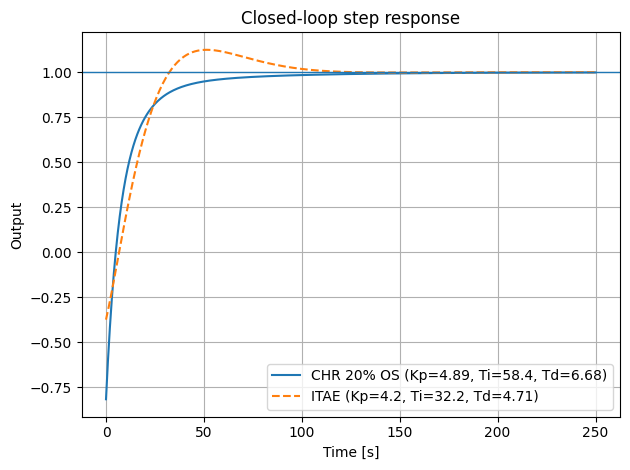

In [24]:
#Plotagem do gráfico
plt.figure()
plt.plot(t_ch, y_ch, label=f'CHR 20% OS (Kp={Kp_chr:.3g}, Ti={Ti_chr:.3g}, Td={Td_chr:.3g})')
plt.plot(t_it, y_it, label=f'ITAE (Kp={Kp_itae:.3g}, Ti={Ti_itae:.3g}, Td={Td_itae:.3g})', linestyle='--')
plt.axhline(1.0, linewidth=1)  # setpoint
plt.xlabel('Time [s]'); plt.ylabel('Output')
plt.title('Closed-loop step response')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

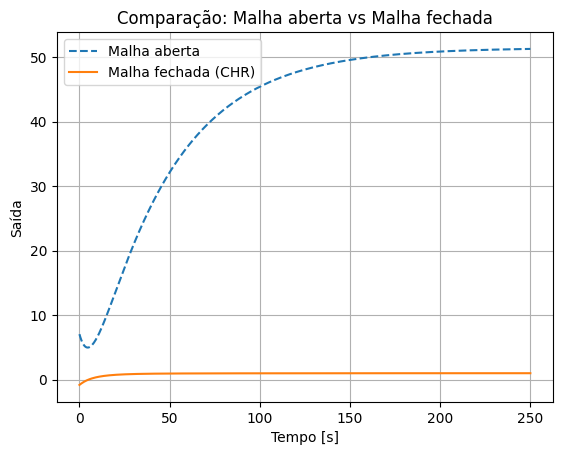

In [28]:
# Plotar juntas
plt.figure()
plt.plot(t_open, y_open, label='Malha aberta', linestyle='--')
plt.plot(t_closed, y_closed, label='Malha fechada (CHR)')
plt.xlabel('Tempo [s]')
plt.ylabel('Saída')
plt.title('Comparação: Malha aberta vs Malha fechada')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-2241395074.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  IAE = np.trapz(np.abs(e), t)
/tmp/ipython-input-2241395074.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ISE = np.trapz(e**2, t)


,metodo,Kp,Ti,Td,tr,ts,Mp,ess,IAE,ISE
0,CHR 20%OS,4.887493,58.35100,6.678760,28.5,87.0,-0.097204,0.000972,20.121200,14.668063
1,ITAE,4.200923,32.15236,4.706775,19.0,31.5,12.480941,0.000013,23.629773,16.374000


CSV salvo: comparativo_CHR_vs_ITAE.csv


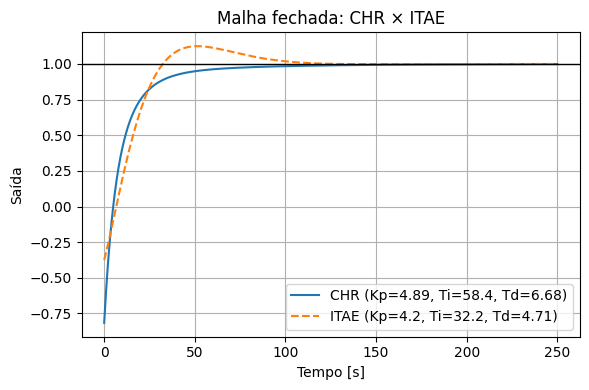

Figura salva: resposta_CHR_vs_ITAE.png


In [29]:
#Comparativo CHR e ITAE
import pandas as pd

def iae_ise(t, y, r=1.0):
    t = np.asarray(t, dtype=float).ravel()
    y = np.asarray(y, dtype=float).ravel()
    if t.shape != y.shape or not np.isfinite(y).all():
        return np.inf, np.inf
    e = r - y
    IAE = np.trapz(np.abs(e), t)
    ISE = np.trapz(e**2, t)
    return IAE, ISE

def sim_e_metrics(nome, Kp, Ti, Td, k, tau, theta, t):
    #Simulando
    t_sim, y_sim = closed_loop_response(Kp, Ti, Td, k, tau, theta, t)
    #Métricas clássicas
    mets = metrics(t_sim, y_sim, y_final=1.0)
    #IAE/ISE
    IAE, ISE = iae_ise(t_sim, y_sim, r=1.0)
    row = dict(metodo=nome, Kp=Kp, Ti=Ti, Td=Td,
               tr=mets["tr"], ts=mets["ts"], Mp=mets["Mp"], ess=mets["ess"],
               IAE=IAE, ISE=ISE)
    return row, (t_sim, y_sim)

#Ganhos CHR e ITAE (usando k, tau, theta escolhidos)
Kp_chr,  Ti_chr,  Td_chr  = pid_from_chr_overshoot(k, tau, theta)
Kp_itae, Ti_itae, Td_itae = pid_from_itae(k, tau, theta)

#Simulações e tabela
rows = []
row_chr,  resp_chr  = sim_e_metrics("CHR 20%OS", Kp_chr,  Ti_chr,  Td_chr,  k, tau, theta, t)
row_itae, resp_itae = sim_e_metrics("ITAE",      Kp_itae, Ti_itae, Td_itae, k, tau, theta, t)
rows += [row_chr, row_itae]

df = pd.DataFrame(rows)
display(df)

#Salvando o CSV
df.to_csv("comparativo_CHR_vs_ITAE.csv", index=False)
print("CSV salvo: comparativo_CHR_vs_ITAE.csv")

#Gráfico e arquivo PNG
t_chr, y_chr = resp_chr
t_it,  y_it  = resp_itae

plt.figure(figsize=(6,4))
plt.plot(t_chr, y_chr, label=f"CHR (Kp={Kp_chr:.3g}, Ti={Ti_chr:.3g}, Td={Td_chr:.3g})")
plt.plot(t_it,  y_it,  "--", label=f"ITAE (Kp={Kp_itae:.3g}, Ti={Ti_itae:.3g}, Td={Td_itae:.3g})")
plt.axhline(1.0, lw=1, color='k')
plt.xlabel("Tempo [s]"); plt.ylabel("Saída"); plt.title("Malha fechada: CHR × ITAE")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.savefig("resposta_CHR_vs_ITAE.png", dpi=200)
plt.show()
print("Figura salva: resposta_CHR_vs_ITAE.png")


In [30]:
#Teste de robustez (±20% em k e τ; θ maior)
def robustez_tabela(k, tau, theta, t, label_ctrl="CHR × ITAE"):
    cenarios = [
        ("Nominal",          k,        tau,        theta),
        ("k +20%",           1.2*k,    tau,        theta),
        ("k -20%",           0.8*k,    tau,        theta),
        ("tau +20%",         k,        1.2*tau,    theta),
        ("tau -20%",         k,        0.8*tau,    theta),
        ("theta +20%",       k,        tau,        1.2*theta),
        ("theta +50%",       k,        tau,        1.5*theta),
    ]
    linhas = []
    for nome, k_, tau_, th_ in cenarios:
        #Sintonias mantidas (mesmos ganhos) ou re-sintonizar?
        #Para robustez de controlador fixo, mantenha os ganhos obtidos no nominal:
        row_chr,  _ = sim_e_metrics(f"CHR ({nome})",  Kp_chr,  Ti_chr,  Td_chr,  k_, tau_, th_, t)
        row_itae, _ = sim_e_metrics(f"ITAE ({nome})", Kp_itae, Ti_itae, Td_itae, k_, tau_, th_, t)
        linhas += [row_chr, row_itae]
    dfr = pd.DataFrame(linhas)
    return dfr

dfr = robustez_tabela(k, tau, theta, t)
display(dfr)

#Salvando o CSV
dfr.to_csv("robustez_CHR_ITAE.csv", index=False)
print("CSV salvo: robustez_CHR_ITAE.csv")


/tmp/ipython-input-2241395074.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  IAE = np.trapz(np.abs(e), t)
/tmp/ipython-input-2241395074.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ISE = np.trapz(e**2, t)


,metodo,Kp,Ti,Td,tr,ts,Mp,ess,IAE,ISE
0,CHR (Nominal),4.887493,58.35100,6.678760,28.5,87.0,-0.097204,9.720450e-04,20.121200,14.668063
1,ITAE (Nominal),4.200923,32.15236,4.706775,19.0,31.5,12.480941,1.302143e-05,23.629773,16.374000
2,CHR (k +20%),4.887493,58.35100,6.678760,20.5,71.0,-0.068521,6.852148e-04,16.779290,14.277761
3,ITAE (k +20%),4.200923,32.15236,4.706775,14.5,25.5,14.095684,1.944728e-07,21.203193,15.545490
4,CHR (k -20%),4.887493,58.35100,6.678760,40.5,110.0,-0.157309,1.573091e-03,25.126579,16.180123
5,ITAE (k -20%),4.200923,32.15236,4.706775,25.0,40.0,10.837076,9.160770e-06,27.113644,17.912564
6,CHR (tau +20%),4.887493,58.35100,6.678760,30.5,60.0,0.102336,1.129253e-04,20.339706,15.419375
7,ITAE (tau +20%),4.200923,32.15236,4.706775,22.0,35.5,15.994295,2.727385e-04,28.277197,17.906422
8,CHR (tau -20%),4.887493,58.35100,6.678760,30.0,121.0,-0.215279,2.152790e-03,20.054168,14.605991
9,ITAE (tau -20%),4.200923,32.15236,4.706775,15.5,27.0,8.201343,3.653363e-06,18.931656,15.040262


CSV salvo: robustez_CHR_ITAE.csv
